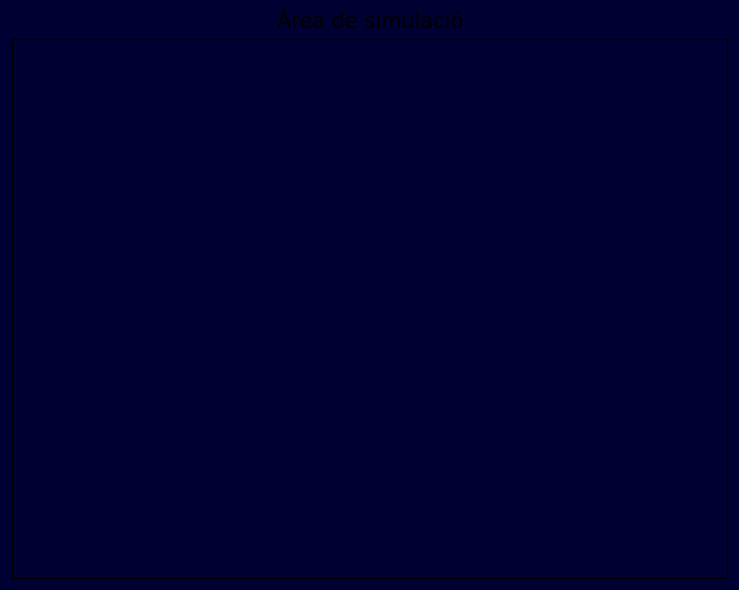

In [4]:
"""
Biel Bernal Pratdesaba
"""
import tkinter as tk
from tkinter import ttk, colorchooser
import ttkbootstrap as tb

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

def simulador_gravitacional_ui():
    win = tb.Window(themename="darkly")
    win.title("Simulador de Cuerpos Sometidos a Atracción Gravitatoria")
    win.geometry("1200x700")
    win.configure(bg='black')

    # Menú superior
    menu_bar = tk.Menu(win)
    win.config(menu=menu_bar)

    menu_bar.add_cascade(label="Archivo")
    menu_bar.add_cascade(label="Cuerpos")
    menu_bar.add_cascade(label="Evaluación")
    menu_bar.add_cascade(label="Ayuda")

    # Frame principal horitzontal
    frame_principal = ttk.Frame(win)
    frame_principal.pack(fill='both', expand=True)

    # Àrea de simulació (esquerra)
    frame_canvas = tk.Frame(frame_principal, bg="#000033", width=900, height=700)
    frame_canvas.pack(side='left', fill='both', expand=True)

    # Embed de matplotlib com a placeholder
    fig, ax = plt.subplots(facecolor='#000033')
    ax.set_facecolor("#000033")
    ax.set_title("Àrea de simulació")
    ax.set_xticks([])
    ax.set_yticks([])
    canvas = FigureCanvasTkAgg(fig, master=frame_canvas)
    canvas.get_tk_widget().pack(fill='both', expand=True)

    # Panell de control (dreta)
    frame_controls = ttk.Frame(frame_principal, padding=15)
    frame_controls.pack(side='right', fill='y')

    # Botó crear cos
    ttk.Button(frame_controls, text="Crear Cuerpo", command=lambda: finestra_crear_cos(win)).pack(pady=10, fill='x')


    # Paràmetres generals
    grup_parametres = ttk.LabelFrame(frame_controls, text="Parámetros Generales")
    grup_parametres.pack(fill='x', pady=10)

    ttk.Label(grup_parametres, text="Constante Gravitatoria:").pack(anchor='w')
    ttk.Scale(grup_parametres, orient='horizontal').pack(fill='x')

    ttk.Label(grup_parametres, text="Reproducción (30.2 fps):").pack(anchor='w', pady=(8, 0))
    ttk.Scale(grup_parametres, orient='horizontal').pack(fill='x')

    ttk.Label(grup_parametres, text="Incremento Temporal:").pack(anchor='w', pady=(8, 0))
    ttk.Scale(grup_parametres, orient='horizontal').pack(fill='x')

    # Color del fons
    ttk.Label(frame_controls, text="Color del fondo galáctico:").pack(anchor='w', pady=(20, 5))
    color_btn = ttk.Entry(frame_controls, width=10)
    color_btn.insert(0, "#000033")
    color_btn.pack(anchor='w')

    def seleccionar_color():
        color = colorchooser.askcolor(initialcolor=color_btn.get())[1]
        if color:
            color_btn.delete(0, 'end')
            color_btn.insert(0, color)
            frame_canvas.config(bg=color)
            fig.patch.set_facecolor(color)
            ax.set_facecolor(color)
            canvas.draw()

    ttk.Button(frame_controls, text="Seleccionar color", command=seleccionar_color).pack(anchor='w', pady=5)

    # Botons d'acció
    frame_botons = ttk.Frame(frame_controls)
    frame_botons.pack(pady=20)

    ttk.Button(frame_botons, text="Inicia", bootstyle="success").pack(side='left', padx=5)
    ttk.Button(frame_botons, text="Reinicia", bootstyle="warning").pack(side='left', padx=5)
    ttk.Button(frame_botons, text="Reset", bootstyle="secondary").pack(side='left', padx=5)
    ttk.Button(frame_botons, text="Termina", bootstyle="danger").pack(side='left', padx=5)

    win.mainloop()

# Funció crear cos
def finestra_crear_cos(master=None):
    finestra = tk.Toplevel(master)
    finestra.title("Crear Cuerpo")
    finestra.geometry("300x550")
    finestra.configure(bg='black')

    # Variables
    forma = tk.StringVar(value='*')
    mida = tk.DoubleVar(value=8)
    massa = tk.DoubleVar(value=1.0)
    color = tk.StringVar(value='#FFFF00')  # groc
    pos_x = tk.DoubleVar(value=0.0)
    pos_y = tk.DoubleVar(value=0.0)
    vel_x = tk.DoubleVar(value=0.0)
    vel_y = tk.DoubleVar(value=0.0)

    def seleccionar_color():
        nou_color = colorchooser.askcolor(initialcolor=color.get())[1]
        if nou_color:
            color.set(nou_color)
            mostra_color.config(bg=nou_color)

    def reiniciar_posicio():
        pos_x.set(0.0)
        pos_y.set(0.0)

    def reiniciar_velocitat():
        vel_x.set(0.0)
        vel_y.set(0.0)

    def acceptar():
        print("Nou cos creat amb:")
        print(f"Forma: {forma.get()}, Mida: {mida.get()}, Massa: {massa.get()}, Color: {color.get()}")
        print(f"Posició: ({pos_x.get()}, {pos_y.get()}), Velocitat: ({vel_x.get()}, {vel_y.get()})")
        finestra.destroy()

    # Estil general
    def etiqueta(text):
        return ttk.Label(finestra, text=text, background='black', foreground='white')

    # Forma
    etiqueta("Forma:").pack(anchor='w', padx=10, pady=(10, 0))
    ttk.Entry(finestra, textvariable=forma).pack(fill='x', padx=10)

    # Mida
    etiqueta("Tamaño:").pack(anchor='w', padx=10, pady=(10, 0))
    ttk.Entry(finestra, textvariable=mida).pack(fill='x', padx=10)

    # Massa
    etiqueta("Masa:").pack(anchor='w', padx=10, pady=(10, 0))
    ttk.Entry(finestra, textvariable=massa).pack(fill='x', padx=10)

    # Color
    etiqueta("Color:").pack(anchor='w', padx=10, pady=(10, 0))
    color_frame = ttk.Frame(finestra)
    color_frame.pack(fill='x', padx=10)
    ttk.Entry(color_frame, textvariable=color, width=15).pack(side='left')
    mostra_color = tk.Label(color_frame, width=3, bg=color.get())
    mostra_color.pack(side='left', padx=5)
    ttk.Button(color_frame, text="...", width=3, command=seleccionar_color).pack(side='left')

    # Posició
    pos_frame = ttk.LabelFrame(finestra, text="Posición", padding=10)
    pos_frame.pack(fill='x', padx=10, pady=10)

    ttk.Label(pos_frame, text="Coordenada X:").grid(row=0, column=0, sticky='w')
    ttk.Entry(pos_frame, textvariable=pos_x, width=10).grid(row=0, column=1)
    ttk.Label(pos_frame, text="Coordenada Y:").grid(row=1, column=0, sticky='w')
    ttk.Entry(pos_frame, textvariable=pos_y, width=10).grid(row=1, column=1)
    ttk.Button(pos_frame, text="Reset", command=reiniciar_posicio).grid(row=0, column=2, rowspan=2, padx=5)

    # Velocitat
    vel_frame = ttk.LabelFrame(finestra, text="Velocidad", padding=10)
    vel_frame.pack(fill='x', padx=10, pady=10)

    ttk.Label(vel_frame, text="Coordenada X:").grid(row=0, column=0, sticky='w')
    ttk.Entry(vel_frame, textvariable=vel_x, width=10).grid(row=0, column=1)
    ttk.Label(vel_frame, text="Coordenada Y:").grid(row=1, column=0, sticky='w')
    ttk.Entry(vel_frame, textvariable=vel_y, width=10).grid(row=1, column=1)
    ttk.Button(vel_frame, text="Reset", command=reiniciar_velocitat).grid(row=0, column=2, rowspan=2, padx=5)

    # Botons
    boto_frame = ttk.Frame(finestra)
    boto_frame.pack(pady=15)

    ttk.Button(boto_frame, text="Mostrar").pack(side='left', padx=5)
    ttk.Button(boto_frame, text="Aceptar", bootstyle="success", command=acceptar).pack(side='left', padx=5)
    ttk.Button(boto_frame, text="Salir", bootstyle="danger", command=finestra.destroy).pack(side='left', padx=5)


if __name__ == "__main__":
    simulador_gravitacional_ui()
